# Exercise 1

**Student: Marusic Diana, matriculation nr 314017**

In [ ]:
import numpy as np
import pickle as pk
from google.colab import drive
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras import Model as Model_
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
# drive.mount('/content/gdrive', force_remount=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

label =["airplane",
		"automobile",
		"bird",
		"cat",
		"deer",
		"dog",
		"frog",
		"horse",
		"ship",
		"truck"]

x_train = x_train/255.
x_test  = x_test/255.

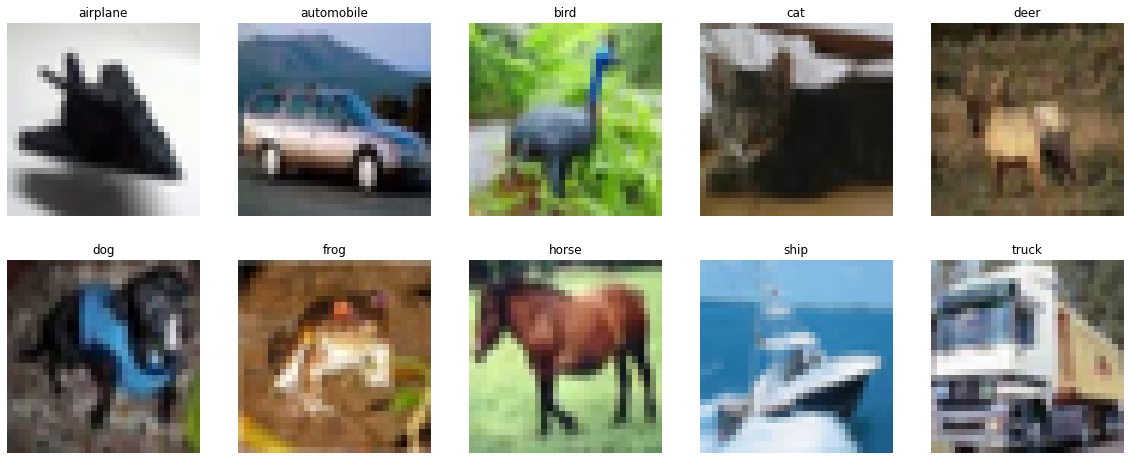

In [ ]:
fig = plt.figure(figsize=(20,8))
gs = grid.GridSpec(2,5)

for i in range(2):
  for j in range(5):

    ax = plt.subplot(gs[i,j])
    cl = j+i*5

    img = x_train[np.where(y_train==cl)[0][0]]
    ax.imshow(img)
    ax.set_title(label[cl])
    ax.axis("off")

In [ ]:
class ToyModel(Model_):
  def __init__(self):
    super(ToyModel, self).__init__()

    self.ConvLayer=[Conv2D(32,3,activation="relu"),
                    Conv2D(32,3,activation="relu"),
                    Conv2D(32,3,activation="relu")]
    self.ConvLayer=Sequential(self.ConvLayer)

    self.flat = tf.keras.layers.Flatten()
    self.dense  = tf.keras.layers.Dense(64,activation="relu")
    self.out  = tf.keras.layers.Dense(10)

  def call(self, input_x):
    x = self.ConvLayer(input_x)
    x = self.flat(x)
    x = self.dense(x)
    return self.out(x)

In [ ]:
toy = ToyModel()
toy.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
            metrics="accuracy")

trainHist = toy.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 16s 5ms/step - loss: 1.6470 - accuracy: 0.4045 - val_loss: 1.4128 - val_accuracy: 0.5020
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3452 - accuracy: 0.5222 - val_loss: 1.3396 - val_accuracy: 0.5254
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2499 - accuracy: 0.5566 - val_loss: 1.2440 - val_accuracy: 0.5623
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1754 - accuracy: 0.5863 - val_loss: 1.1906 - val_accuracy: 0.5753
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1108 - accuracy: 0.6078 - val_loss: 1.1680 - val_accuracy: 0.5864
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0573 - accuracy: 0.6276 - val_loss: 1.1121 - val_accuracy: 0.6023
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0045 - accuracy: 0.6482 - val_loss: 1.1146 - val_accura

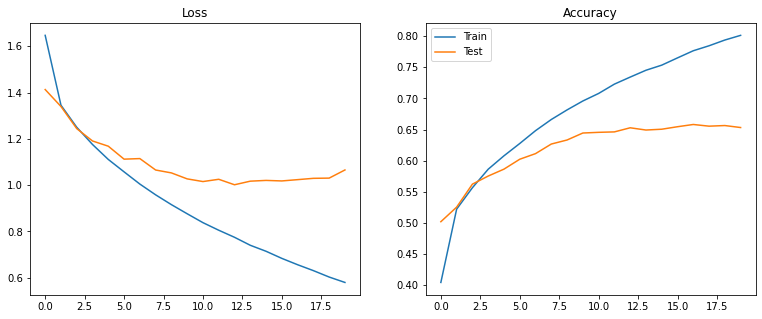

In [ ]:
fig = plt.figure(figsize=(13,5))
gs = grid.GridSpec(1,2)

ax = plt.subplot(gs[0,0])
ax.plot(trainHist.history["loss"],label="Train")
ax.plot(trainHist.history["val_loss"],label="Test")
ax.set_title("Loss")

ax = plt.subplot(gs[0,1])
ax.plot(trainHist.history["accuracy"],label="Train")
ax.plot(trainHist.history["val_accuracy"],label="Test")
ax.set_title("Accuracy")

plt.legend()

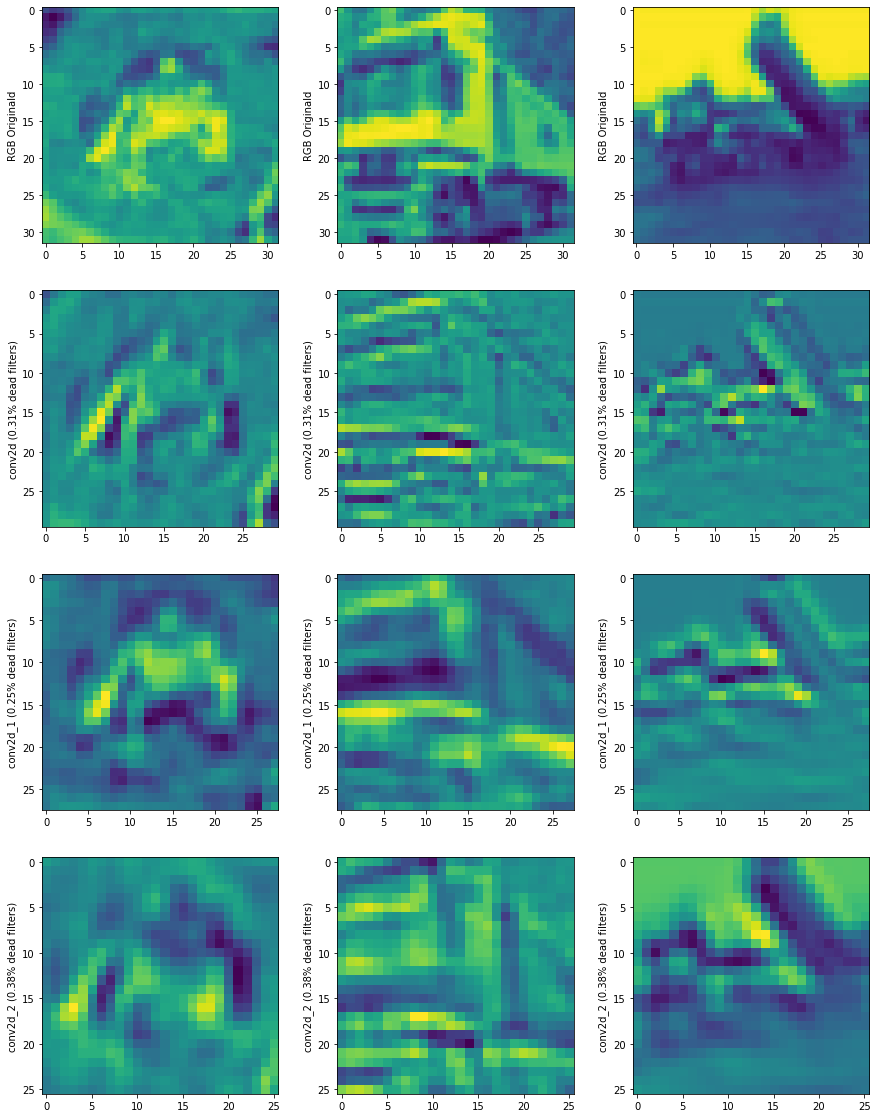

In [ ]:
fig = plt.figure(figsize=(15,5*int(1+len(toy.ConvLayer.layers))))
gs = grid.GridSpec(len(toy.ConvLayer.layers)+1,3)

img = x_train[:3]/255.0
for c in range(3):
  ax = plt.subplot(gs[0,c])
  ax.imshow(img[c,:,:,c])
  ax.set_ylabel("RGB Originald")

for idx,l in enumerate(toy.ConvLayer.layers):
  img = l(img)

  for c in range(3):
    nonzero = np.where(np.mean(img,(0,1,2))!=0)[0]
    zero = len(nonzero)/img.shape[-1]
    ax = plt.subplot(gs[idx+1,c])
    ax.imshow(img[c,:,:,nonzero[c]])

    ax.set_ylabel(f"{l.name} ({np.round(1-zero,2)}% dead filters)")

# Excercise

## Build a CNN architecture to classify this data-set

1) The task is to create a convolutional model that achieves >70% test accuracy. For simplicity test=validation and >70% test accuracy counts when the last 3 epochs' validation accuracy are above the threshold.

Beyond the 2D-convolution you can try to experiment with:
  - Pooling
  - Regularization (Weight reg, clipping, dropout)
  - Batch Normalization
  - Different activation functions
  - Data augmentation

Note that the usage of all these components is **not** necessary and can is also not advised as the combination of all these methods can lead to performance degration. Focus more on finding the components that help and put them in the correct order.

For starting tips you can take a look at the paper: https://www.isip.uni-luebeck.de/fileadmin/uploads/tx_wapublications/hertel_ijcnn_2015.pdf

The devised network must have **less than** 400K parameters.

You can use the training pipeline from the previous exercise or stick to the more simpler version in this one.

If you happen to have recurring blocks, please modulate them to avoid code redundancy

2) Run for 30 epochs max and report your results. Furthermore, print the confusion matrix for the test test

3) For each class, show the image with the lowest respective class probability for its own class.

Bonus (3 pts): Achieve over 76% accuracy!

In [ ]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

class DeepConvNN(Model_):
  def __init__(self):
    super(DeepConvNN, self).__init__()

    # self.Conv1=Conv2D(72,kernel_size=(3,3), activation="relu")
    # self.Conv2=Conv2D(48,kernel_size=(3,3),activation="relu")
    # self.Conv3=Conv2D(32,kernel_size=(4,4),activation="relu")

    self.Conv1=Conv2D(32,kernel_size=(3,3), activation="relu")
    self.Conv2=Conv2D(48,kernel_size=(3,3),activation="relu")
    self.Conv3=Conv2D(72,kernel_size=(4,4),activation="relu")
    self.Conv4=Conv2D(128,kernel_size=(4,4),activation="relu")
    # self.Conv4=Conv2D(80,kernel_size=(2,2),activation="relu")

    # self.Conv1=Conv2D(64,kernel_size=(3,3), activation="gelu")
    # # self.Conv2=Conv2D(48,kernel_size=(3,3),activation="gelu")
    # self.Conv3=Conv2D(32,kernel_size=(4,4),activation="gelu")

    self.MaxPool1 = MaxPooling2D(pool_size=(2, 2), padding="valid")
    # self.MaxPool2 = MaxPooling2D(pool_size=(2, 2), padding="valid")
    self.MaxPool3 = MaxPooling2D(pool_size=(2, 2), padding="valid")

    self.Dropout1 = tf.keras.layers.Dropout(0.2)
    self.Dropout2 = tf.keras.layers.Dropout(0.3)

    self.flat = tf.keras.layers.Flatten()
    self.dense1  = tf.keras.layers.Dense(64,activation="relu")
    # self.dense1  = tf.keras.layers.Dense(64,activation="gelu")
    # self.dense2  = tf.keras.layers.Dense(32,activation="gelu")
    self.out  = tf.keras.layers.Dense(10, activation="softmax")

  def call(self, input_x):
    x = self.Conv1(input_x)
    x = self.Conv2(x)
    x = self.MaxPool1(x)
    x = self.Dropout1(x)

    x = self.Conv3(x)
    x = self.Conv4(x)
    x = self.MaxPool3(x)
    x = self.Dropout2(x)

    x = self.flat(x)
    x = self.dense1(x)
    # x = self.dense2(x)
    return self.out(x)

In [ ]:
model = DeepConvNN()
# model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            # optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003), #model achieves 79% acc in 30 epochs with this lr
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),

            metrics="accuracy")


In [ ]:
trainHist1 = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7529 - accuracy: 0.3510 - val_loss: 1.4651 - val_accuracy: 0.4702
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4062 - accuracy: 0.4907 - val_loss: 1.3012 - val_accuracy: 0.5313
Epoch 3/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2531 - accuracy: 0.5510 - val_loss: 1.1643 - val_accuracy: 0.5835
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1521 - accuracy: 0.5914 - val_loss: 1.1227 - val_accuracy: 0.5956
Epoch 5/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0794 - accuracy: 0.6182 - val_loss: 1.0290 - val_accuracy: 0.6346
Epoch 6/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0182 - accuracy: 0.6439 - val_loss: 0.9664 - val_accuracy: 0.6619
Epoch 7/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9639 - accuracy: 0.6610 - val_loss: 0.9384 - val_acc

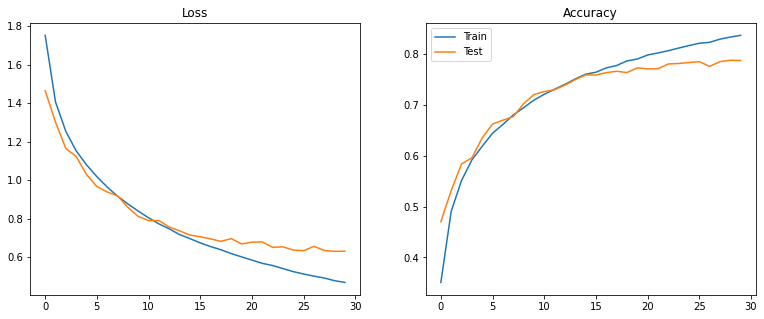

In [ ]:
fig = plt.figure(figsize=(13,5))
gs = grid.GridSpec(1,2)

ax = plt.subplot(gs[0,0])
ax.plot(trainHist1.history["loss"],label="Train")
ax.plot(trainHist1.history["val_loss"],label="Test")
ax.set_title("Loss")

ax = plt.subplot(gs[0,1])
ax.plot(trainHist1.history["accuracy"],label="Train")
ax.plot(trainHist1.history["val_accuracy"],label="Test")
ax.set_title("Accuracy")

plt.legend()

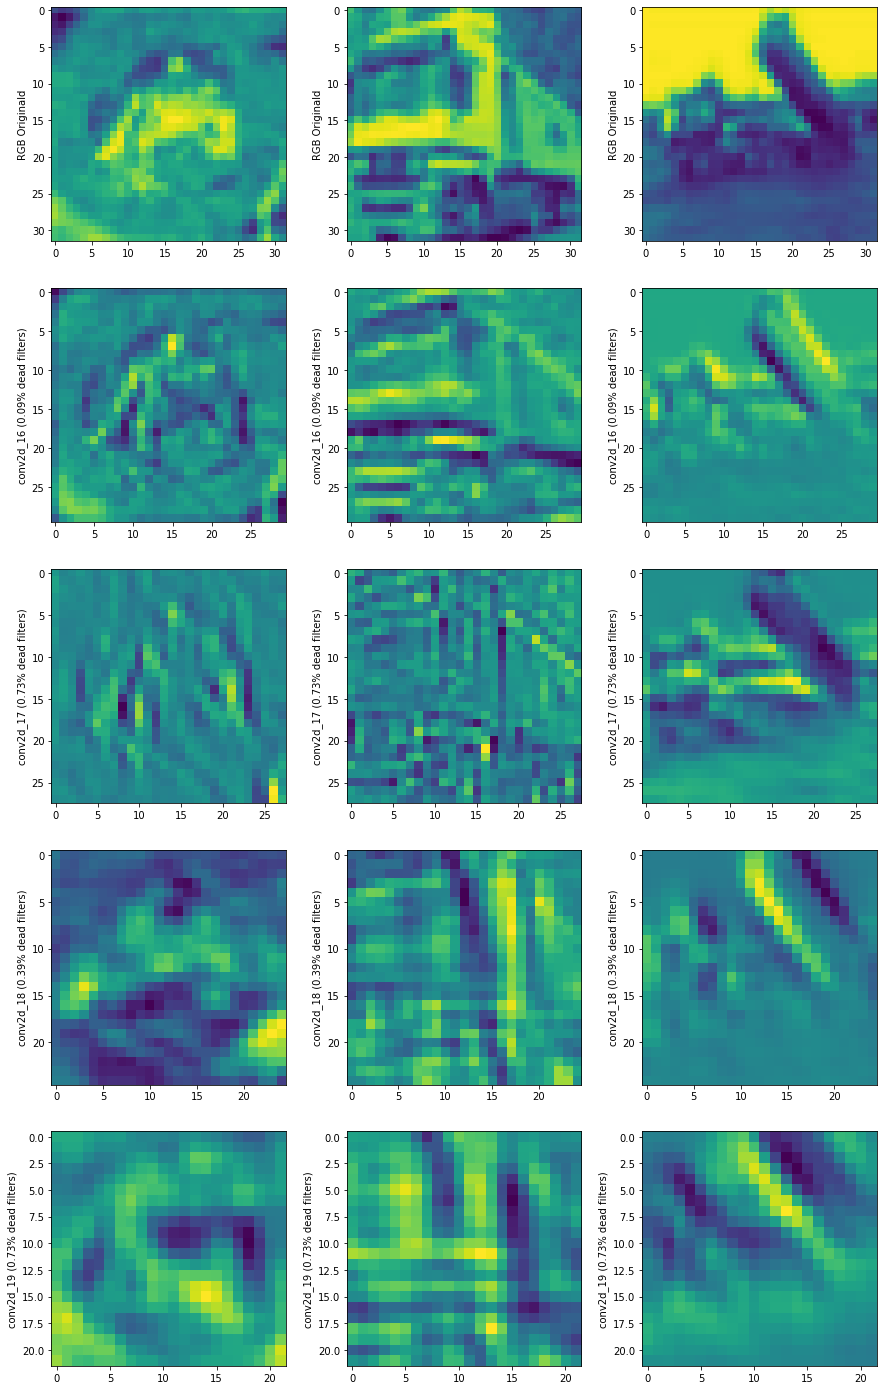

In [ ]:
n_conv_layers = 4
fig = plt.figure(figsize=(15,5*int(1+n_conv_layers)))
gs = grid.GridSpec(n_conv_layers+1,3)

img = x_train[:3]/255.0
for c in range(3):
  ax = plt.subplot(gs[0,c])
  ax.imshow(img[c,:,:,c])
  ax.set_ylabel("RGB Originald")

for idx,l in enumerate([model.Conv1,model.Conv2,model.Conv3, model.Conv4]):
# for idx,l in enumerate([model.Conv1,model.Conv3]):
  img = l(img)

  for c in range(3):
    nonzero = np.where(np.mean(img,(0,1,2))!=0)[0]
    zero = len(nonzero)/img.shape[-1]
    ax = plt.subplot(gs[idx+1,c])
    ax.imshow(img[c,:,:,nonzero[c]])

    ax.set_ylabel(f"{l.name} ({np.round(1-zero,2)}% dead filters)")

The key to making the model better was adding 2 dropout layers. Before adding dropout, many configurations of the networks that I tried with 3 or 4 layers were achieving at most 73% accuracy on the validation step. With dropout, the model is able to achieve over 78% accuracy.

### Changing the learning rate and re-running the model

In [ ]:
model = DeepConvNN()
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003), #model achieves over 79% acc in 30 epochs with this lr
            metrics="accuracy")

In [ ]:
trainHist1 = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5816 - accuracy: 0.4155 - val_loss: 1.2471 - val_accuracy: 0.5551
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1903 - accuracy: 0.5755 - val_loss: 1.0647 - val_accuracy: 0.6228
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0253 - accuracy: 0.6382 - val_loss: 0.9992 - val_accuracy: 0.6464
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9203 - accuracy: 0.6758 - val_loss: 0.9208 - val_accuracy: 0.6735
Epoch 5/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8380 - accuracy: 0.7063 - val_loss: 0.9092 - val_accuracy: 0.6771
Epoch 6/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7727 - accuracy: 0.7294 - val_loss: 0.7670 - val_accuracy: 0.7333
Epoch 7/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7112 - accuracy: 0.7494 - val_loss: 0.7632 - val_accu

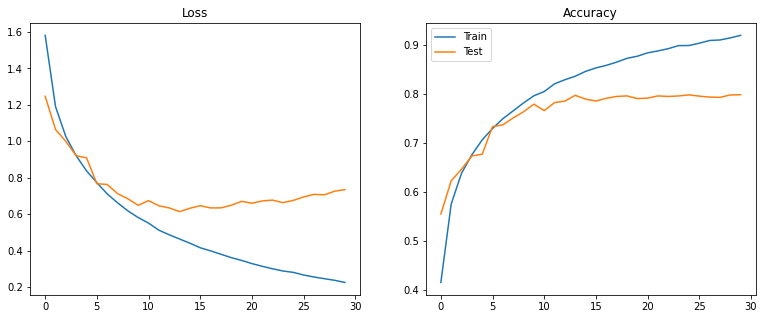

In [ ]:
fig = plt.figure(figsize=(13,5))
gs = grid.GridSpec(1,2)

ax = plt.subplot(gs[0,0])
ax.plot(trainHist1.history["loss"],label="Train")
ax.plot(trainHist1.history["val_loss"],label="Test")
ax.set_title("Loss")

ax = plt.subplot(gs[0,1])
ax.plot(trainHist1.history["accuracy"],label="Train")
ax.plot(trainHist1.history["val_accuracy"],label="Test")
ax.set_title("Accuracy")

plt.legend()

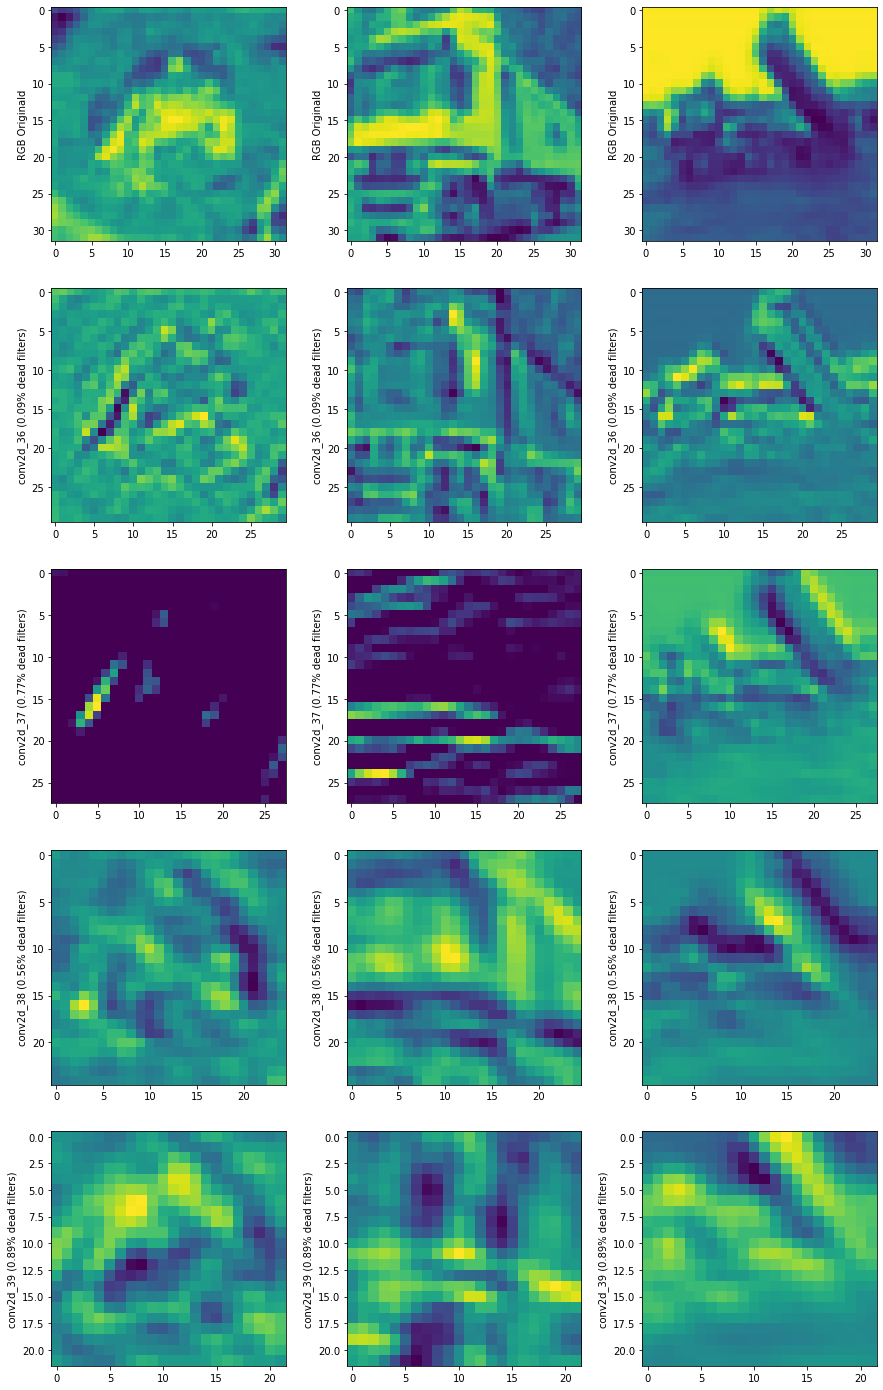

In [ ]:
n_conv_layers = 4
fig = plt.figure(figsize=(15,5*int(1+n_conv_layers)))
gs = grid.GridSpec(n_conv_layers+1,3)

img = x_train[:3]/255.0
for c in range(3):
  ax = plt.subplot(gs[0,c])
  ax.imshow(img[c,:,:,c])
  ax.set_ylabel("RGB Originald")

for idx,l in enumerate([model.Conv1,model.Conv2,model.Conv3, model.Conv4]):
# for idx,l in enumerate([model.Conv1,model.Conv3]):
  img = l(img)

  for c in range(3):
    nonzero = np.where(np.mean(img,(0,1,2))!=0)[0]
    zero = len(nonzero)/img.shape[-1]
    ax = plt.subplot(gs[idx+1,c])
    ax.imshow(img[c,:,:,nonzero[c]])

    ax.set_ylabel(f"{l.name} ({np.round(1-zero,2)}% dead filters)")

Learning rate is an important parameter. With a learning rate of 0.0001 (as in the toy model example), the model achieves about 78% accuracy in 30 epochs, while with a learning rate of 0.0003, the model is able to achieve over 79% accuracy in 30 epochs.

Although the model is achieving faster results with a higher learning rate, it's still a little unstable, so in general, the model should achieve higher accuracy if running with a smaller rate, but on more epochs.

### Counting the number of parameters of the model:

In [ ]:
import tensorflow.keras.backend as K

trainable_par_count = np.sum([K.count_params(w) for w in model.trainable_weights])
non_trainable_par_count = np.sum([K.count_params(w) for w in model.non_trainable_weights])

print('Total parameters: {:,}'.format(trainable_par_count + non_trainable_par_count))
print('Trainable parameters: {:,}'.format(trainable_par_count))
print('Non-trainable parameters: {:,}'.format(non_trainable_par_count))

Total parameters: 349,506.0
Trainable parameters: 349,506
Non-trainable parameters: 0.0


## Plotting the confusion matrix

Getting the predictions:

In [ ]:
# y_pred = model.predict(x_train, verbose=1)
# y_pred = np.argmax(y_pred, axis=1)
y_pred = model.predict(x_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)


313/313 [==============================] - 1s 2ms/step


Plotting the confusion matrix:

In [ ]:
# the labels are already defined above, but just copying them here for convenience:
labels =["airplane",
		"automobile",
		"bird",
		"cat",
		"deer",
		"dog",
		"frog",
		"horse",
		"ship",
		"truck"]

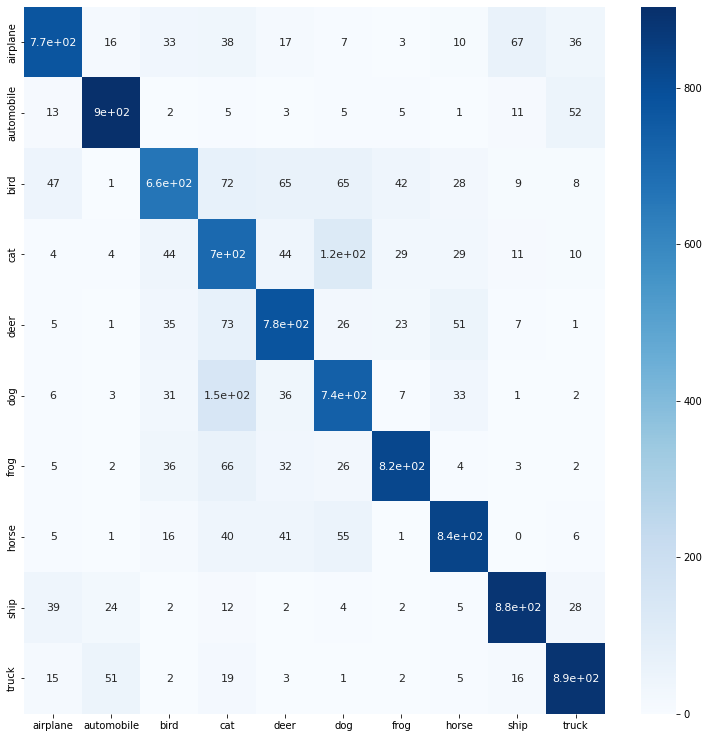

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (13,13))

sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 11},
            xticklabels=labels, yticklabels=labels, cbar=True, cmap="Blues")
plt.show()

## 3) For each class, show the image with the lowest respective class probability for its own class.

In [ ]:
y_pred = model.predict(x_test, verbose=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[0]

array([1.4563703e-07, 1.2331149e-07, 3.8980921e-05, 9.7566563e-01,
       1.2361463e-06, 2.3923535e-02, 3.6555808e-04, 9.0631232e-08,
       4.7193175e-06, 5.2890851e-08], dtype=float32)

Because the network uses softmax in the last layer, the prediction is actually a list of probabilities for each class. To obtain the final predicted class, we must extract the class with the highest probability by using the argmax:

In [ ]:
predicted_final_labels = np.argmax(y_pred, axis=1)
print("labels of the first 10 images:")
predicted_final_labels[:10]

labels of the first 10 images:


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [ ]:
# the labels are already defined above, but just copying them here for convenience:
labels =["airplane",
		"automobile",
		"bird",
		"cat",
		"deer",
		"dog",
		"frog",
		"horse",
		"ship",
		"truck"]

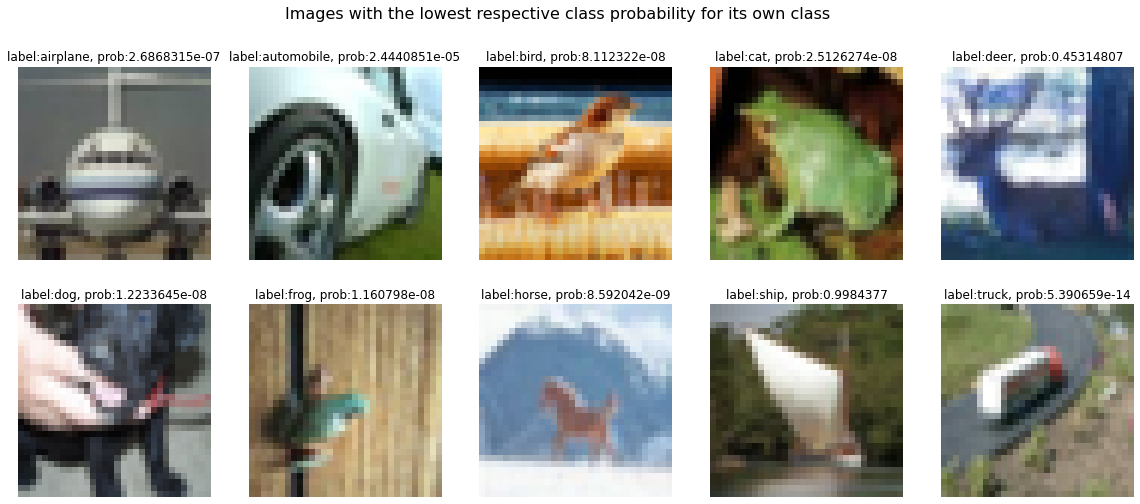

In [ ]:
fig = plt.figure(figsize=(20,8))
gs = grid.GridSpec(2,5)

for i in range(2):
  for j in range(5):

    ax = plt.subplot(gs[i,j])
    label_index = j+i*5

    label = labels[label_index]

    # get all the indexes of images from the respective class:
    # (need to transpose y_test because it's a column vector, we need a row vector to get one index)
    images_from_this_class_idxes = np.argwhere(y_test.flatten()==label_index)
    # print("images_from_this_class_idxes:", images_from_this_class_idxes[:2])

    # get all predictions for the images from the respective class:
    preds_from_this_class = y_pred[images_from_this_class_idxes]
    # print("preds_from_this_class[0]:", preds_from_this_class[0])
    # print("---")

    # get only the probability for the respective class from all the predictions:
    preds_from_this_class_prob = np.array([x[0][label_index] for x in preds_from_this_class])
    # print("nr of predictions from this class:", len(preds_from_this_class_prob))

    #get the image with the lowest probability for its respective class:
    img_lowest_prob_idx = np.argmin(preds_from_this_class_prob)
    # print("img with the lowest_prob index:", img_lowest_prob_idx)

    # images_from_this_class_idxes = x_train[np.where(y_train==label_index)]
    img = x_test[images_from_this_class_idxes][img_lowest_prob_idx][0]

    ax.imshow(img)
    ax.set_title("label:" + label + ", prob:" + str(y_pred[img_lowest_prob_idx][label_index]))
    ax.axis("off")


fig.suptitle('Images with the lowest respective class probability for its own class', fontsize=16)
plt.show()
